# Generazione data set sintetico

In [1]:
# Vari import da usare
import numpy as np
import matplotlib.pyplot as plt

# Supporto per operazioni tra matrici e vettori
from numpy import matmul
from numpy import transpose
from numpy.linalg import inv
from numpy.linalg import pinv

In [2]:
def MakeSyntethicData(n=100, ifplot=False):
    """ Restituisce una matrice X di 2 covariate e n righe,
        e il vettore Y di n righe con le rispettive label.
        Se ifplot=True fa uno scatter plot nel piano delle covariate """
    
    # Prima genero il campione di covariate per i punti classificati "blue"
    np.random.seed(13)
    x1_blue = np.random.normal(2, 0.8, n)
    x2_blue = np.random.normal(6, 0.8, n)    

    # Poi genero il campione di covariate per i punti classificati "rossi"
    # in modo che sia estratti da due distribuzioni diverse
    m = 20
    x1_red = np.random.normal(4, 0.5, max(n, n-m))
    x2_red = np.random.normal(3, 0.5, max(n, n-m))
    if n > m:
        x1_red = np.append(x1_red, np.random.normal(10, 0.5, 20))
        x2_red = np.append(x2_red, np.random.normal(0, 0.5, 20))

    if ifplot:
        fig, ax = plt.subplots(figsize=(7, 7))
        ax.scatter(x1_blue, x2_blue, alpha=0.5, c='blue')
        ax.scatter(x1_red, x2_red, alpha=0.5, c='red')
        ax.set_xlabel('Covariata x1')
        ax.set_ylabel('Covariata x2')
        ax.legend(('Blue=0', 'Red=1'))
        plt.show()

    # Prepara la matrice delle covariate X e il vettore di label Y    
    X = []
    Y = []
    # Documentazione per la funzione zip()
    # https://docs.python.org/3.6/library/functions.html#zip
    for x,y in zip(x1_blue,x2_blue):
        X.append((x,y))
        Y.append(0)  # 0 = blue

    for x,y in zip(x1_red,x2_red):
        X.append((x,y))
        Y.append(1)  # 1 = red
  
    return X, Y

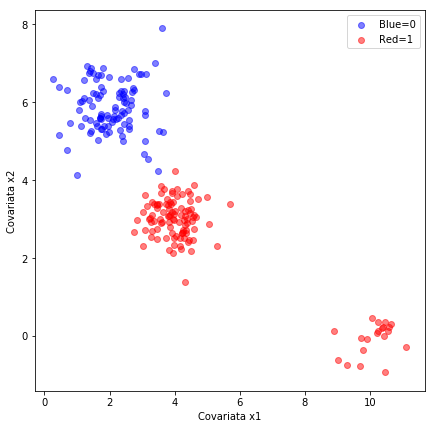

In [3]:
X,Y = MakeSyntethicData(100, True)

# Esercizio 1: Regressione Lineare
Si usino le [slide usate a lezione](http://www-dimat.unipv.it/~gualandi/programmazione2/slide_regressioni.pdf). 

Confrontare i coefficienti $w$ trovati dalla vostra soluzione con quelli che trova la classe `LinearRegression` della libreria `Scikit Learn`.

In [4]:
class RegressioneLineare(object):
    def fit(self, x, y):
        # Build the matrix with vector (1, x) as rows
        X = np.matrix(list(map(lambda row: np.append([1], row), x)))
        # Solve the normal equation (what if X is not invertible?)
        self.w = matmul(matmul(inv(matmul(transpose(X), X)), transpose(X)), y)
                
    def predict(self, x):
        # Build the matrix with vector (1, x) as rows
        X = np.matrix(list(map(lambda row: np.append([1], row), x)))
        # Predict values        
        return matmul(transpose(X), self.w)

In [5]:
from sklearn.linear_model import LinearRegression    

lr = LinearRegression(normalize=False)
lr.fit(X, Y)
print('Scikit LinearRegression, pesi trovati:', lr.intercept_, lr.coef_)

my = RegressioneLineare()
my.fit(X,Y)
print('My Regressione lineare, pesi trovati:', my.w)


Scikit LinearRegression, pesi trovati: 2.03773968679 [-0.07912421 -0.29747821]
My Regressione lineare, pesi trovati: [[ 2.03773969 -0.07912421 -0.29747821]]


# Esercizio 2: Regressione Logistica
Si usino le [slide usate a lezione](http://www-dimat.unipv.it/~gualandi/programmazione2/slide_regressioni.pdf).

Confrontare i coefficienti $w$ trovati dalla vostra soluzione con quelli che trova la classe `LinearRegression` della libreria `Scikit Learn`.

In [6]:
class RegressioneLogistica(object):
    def fit(self, x, y):
        # DA COMPLETARE: METODO DI NEWTON RAPHSON SULLE SLIDES
        pass
    
    def predict(self, x):
        # DA COMPLETARE: USARE I PARAMETRI w
        pass